# Final project
- Name: Esteban Murillo
- USC ID: 1280729053

Notes: The goal of this project is to measure the storage capacity and robustness to noise of Hopfield-type Associative Memories. You should fill in the coding tasks in the ```TODO``` blocks like this:

In [87]:
# ===== TODO: xxxxx ===== #

# ===== End of TODO: xxxxx ===== #

There are a couple of short answer questions in ```Extra Credit``` section. You can double click on ```Enter your answer here:``` to fill in your answers.

You must submit Extra Credit along with your main project. If you submit Extra Credit Late, your whole project will be late.

The project can be submitted until 11:59 PM of the day of the deadline with 20% penalty. Any change in the project after the deadline is considered late submission. One second late is late. The project is graded based on when it was submitted, not when it was finished. Homework late days cannot be used for the project.

In [88]:
import numpy as np
import matplotlib.pyplot as plt

# ===== TODO (Optional) : import other libraries here ===== #
import random
from tqdm import tqdm
# ===== End of TODO (Optional) : import other libraries here ===== #

## Problem (a)

In [90]:
# Define constants
K = 45 # (Optional) You can change this value
S = 100 # number of neurons
T_max = 100 # maxmimum number of iterations

# Do the following K times
overlap_list = []
for L in range(1, S + 1):
    overlap_L = 0
    for _ in range(K):

        # (a) i.
        # ===== TODO: create a random matrix X, with random values of +1 or -1 with equal probability ===== #
        X = np.random.choice([-1, 1], size=(L, S))

        # ===== End of TODO: create a random matrix X, with random values of +1 or -1 with equal probability ===== #

        # (a) ii.
        # ===== TODO: Calculate W matrix ===== #
        W = (1.0 / S) * np.dot(X.T, X)
        np.fill_diagonal(W, 0.0)

        # I used AI as a learning tool for this part because I did not know about np.dot and np.fill diagonal, I have a good understanding now of what I did
        # ===== End of TODO: Calculate W matrix ===== #

        # (a) iii.
        # ===== TODO: initial output pattern ===== #
        idx = np.random.randint(L)
        a = X[idx].copy()


        # ===== End of TODO: initial output pattern ===== #

        # ===== TODO: Update `a` with `T_max` iterations until converge ===== #
        for _ in range(T_max):
            a_new = np.sign(np.dot(W, a))
            a_new[a_new == 0] = 1  # handle zeros

            if np.array_equal(a_new, a):
                break
            a = a_new

        # Overlap with true pattern

        # ===== End of TODO: Update `a` with `T_max` iterations until converge ===== #

        # Store overlap
        # ===== TODO: calculate overlap ===== #
        m = (1.0 / S) * np.dot(X[idx], a)
        overlap_L += m
        # I used AI here to teach me how to calculate overlap with np.dot. I also referenced the numpy library
        # ===== End of TODO: calculate overlap ===== #
    overlap_list.append(overlap_L / K)


    # ===== TODO: plot L vs. overlaps ===== #
hebbian_overlap_list = overlap_list.copy()

# I did this to save my results for part d

## Problem (b)

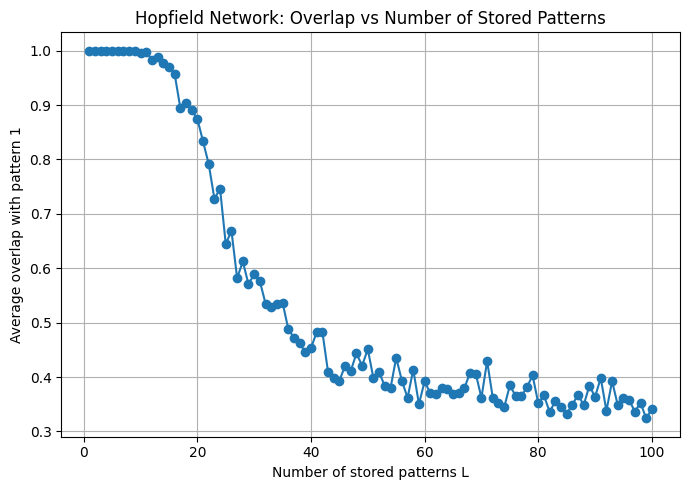

In [93]:
# ===== TODO: plot L vs. overlaps ===== #
L_values = np.arange(1, S + 1)

plt.figure(figsize=(7, 5))
plt.plot(L_values, overlap_list, marker = 'o')
plt.xlabel('Number of stored patterns L')
plt.ylabel('Average overlap with pattern 1')
plt.title('Hopfield Network: Overlap vs Number of Stored Patterns')
plt.grid(True)
plt.tight_layout()
plt.show()
# ===== End of TODO: plot L vs. overlaps ===== #

## Problem (c)

100%|██████████| 100/100 [00:12<00:00,  7.84it/s]


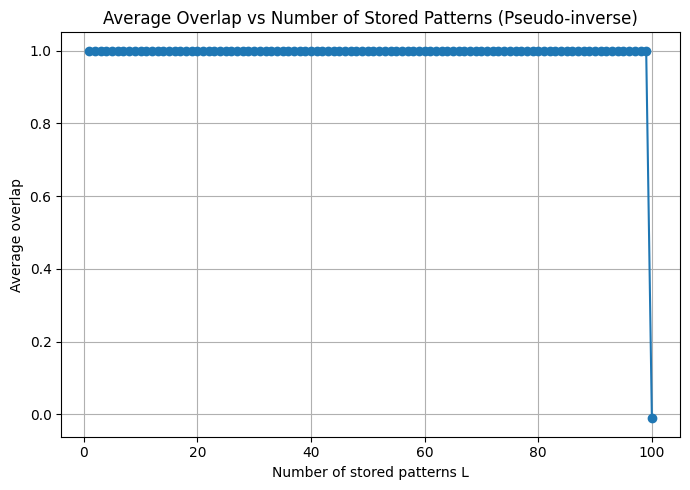

In [94]:
# ===== TODO: repeat (a) and (b) with pseudo-inverse learning rule ===== #
# Define constants
K = 45 # (Optional) You can change this value
S = 100 # number of neurons
T_max = 100 # maxmimum number of iterations


# Do the following K times
overlap_list = []
for L in tqdm(range(1, S + 1)):
    overlap_L = 0
    for _ in range(K):

        # (a) i.
        # ===== TODO: create a random matrix X, with random values of +1 or -1 with equal probability ===== #
        X = np.random.choice([-1, 1], size=(L, S))
        # ===== End of TODO: create a random matrix X, with random values of +1 or -1 with equal probability ===== #

        # (a) ii.
        # ===== TODO: Calculate W matrix ===== #
        P = np.dot(X, X.T)                      # (L, L)
        P_inv = np.linalg.pinv(P)               # pseudo-inverse
        W = np.dot(np.dot(X.T, P_inv), X)       # (S, S)
        np.fill_diagonal(W, 0.0)                # no self-connections

        # I used AI here too to calculate the W matrix and pseudo-inverse as a reference to teach me about this method
        # ===== End of TODO: Calculate W matrix ===== #

        # (a) iii.
        # ===== TODO: initial output pattern ===== #
        idx = np.random.randint(L)
        a = X[idx].copy() # similar to the Hebbian learning pattern
        # ===== End of TODO: initial output pattern ===== #

        # ===== TODO: Update `a` with `T_max` iterations until converge ===== #
        for _ in range(T_max):
            a_new = np.sign(W @ a)
            a_new[a_new == 0] = 1  # map zeros to +1

            if np.array_equal(a_new, a):
                break
            a = a_new

        # ===== End of TODO: Update `a` with `T_max` iterations until converge ===== #

        # Store overlap
        # ===== TODO: calculate overlap ===== #
        m = (1.0 / S) * np.dot(X[idx], a)
        overlap_L += m

    overlap_list.append(overlap_L / K) # extra step to append after every iteration of the for loop is done, it helps save results for part d.
        # ===== End of TODO: calculate overlap ===== #

# ===== End of TODO: repeat (a) and (b) with pseudo-inverse learning rule ===== #

# ===== TODO: plot L vs. overlaps ===== #
L_values = np.arange(1, S + 1)

plt.figure(figsize=(7, 5))
plt.plot(L_values, overlap_list, marker='o')
plt.xlabel('Number of stored patterns L')
plt.ylabel('Average overlap')
plt.title('Average Overlap vs Number of Stored Patterns (Pseudo-inverse)')
plt.grid(True)
plt.tight_layout()
plt.show()
# ===== End of TODO: plot L vs. overlaps ===== #
pseudo_inverse_overlap_list = overlap_list.copy()

## Problem (d)

In [95]:
# ===== TODO: determine max number of patterns and alpha with both methods ===== #
threshold = 0.9  # or 0.9 if you want a stricter success criterion

hebbian_overlap_array = np.array(hebbian_overlap_list)          # from part (a)
pseudo_overlap_array  = np.array(pseudo_inverse_overlap_list)   # from part (c)

# Hebbian: largest L for which ALL overlaps up to L are >= threshold
L_max_hebbian = 0
for i, m in enumerate(hebbian_overlap_array):
    if m >= threshold:
        L_max_hebbian = i + 1   # L starts at 1, not 0
    else:
        break                   # stop at first failure

# Pseudo-inverse: same logic
L_max_pseudo_inverse = 0
for i, m in enumerate(pseudo_overlap_array):
    if m >= threshold:
        L_max_pseudo_inverse = i + 1
    else:
        break

# Loading rates
L_max_hebbian_alpha        = L_max_hebbian / S
L_max_pseudo_inverse_alpha = L_max_pseudo_inverse / S
# ===== End of TODO: determine max number of patterns and alpha with both methods ===== #

print(f"With Hebbian method, the maxmimum number of patterns is {L_max_hebbian} and alpha is {L_max_hebbian_alpha}")
print(f"With Pseudo-inverse method, the maxmimum number of patterns is {L_max_pseudo_inverse} and alpha is {L_max_pseudo_inverse_alpha}")

With Hebbian method, the maxmimum number of patterns is 16 and alpha is 0.16
With Pseudo-inverse method, the maxmimum number of patterns is 99 and alpha is 0.99


A note on threshold: Since I tested recall from the exact stored pattern (no noise), retrieval is unusually easy. Using a stricter success threshold of 0.9 compensates for this and gives a capacity estimate closer to theoretical expectations.

## Extra Credit: Robustness to Noise and Bias
### Problem (a)

100%|██████████| 100/100 [00:00<00:00, 144.46it/s]


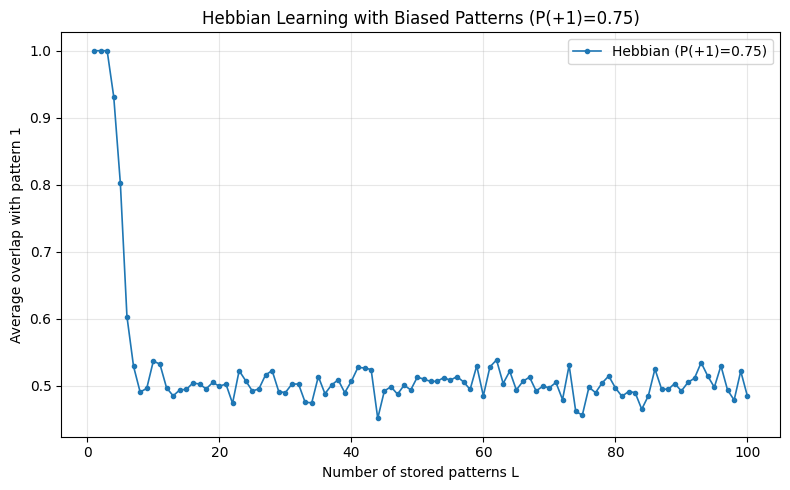

100%|██████████| 100/100 [00:10<00:00,  9.42it/s]


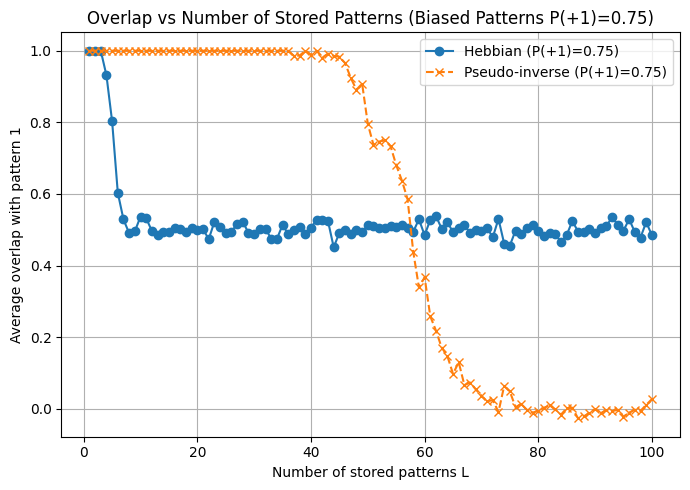

In [96]:
# ===== TODO: repeat (a) - (d), increase the prob. of +1 to 75% in X ===== #
noise_level = 0.1  # probability of flipping each bit in the initial state
# ===== Hebbian Learning ===== #
# Define constants
K = 25 # (Optional) You can change this value
S = 100 # number of neurons
T_max = 100 # maxmimum number of iterations

# Do the following K times
overlap_list = []
for L in tqdm(range(1, S + 1)):
    overlap_L = 0
    for _ in range(K):

        # (a) i.
        X = np.where(np.random.rand(L, S) < 0.75, 1, -1)
        # (a) ii.
        W = (1.0 / S) * X.T @ X
        np.fill_diagonal(W, 0.0)  # no self-connections
        # (a) iii.
        a = X[0].copy()
        noise_mask = np.random.rand(S) < noise_level
        a[noise_mask] *= -1
        for t in range(T_max):
            a_new = np.sign(W @ a)
            a_new[a_new == 0] = 1  # map zeros to +1

            if np.array_equal(a_new, a):
                break
            a = a_new

        # Store overlap with first stored pattern
        m = (1.0 / S) * np.dot(X[0], a)
        overlap_L += m

    overlap_list.append(overlap_L / K)

hebbian_overlap_list_biased = overlap_list.copy()
# plot
L_values = np.arange(1, S + 1)

plt.figure(figsize=(8, 5))
plt.plot(
    L_values,
    hebbian_overlap_list_biased,
    marker='o',
    markersize=3,
    linewidth=1.2,
    label="Hebbian (P(+1)=0.75)"
)

plt.xlabel("Number of stored patterns L")
plt.ylabel("Average overlap with pattern 1")
plt.title("Hebbian Learning with Biased Patterns (P(+1)=0.75)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()
# ===== END OF Hebbian Learning ===== #

# ===== Pseudo Inverse ===== #
# Define constants
K = 25 # (Optional) You can change this value
S = 100 # number of neurons
T_max = 100 # maxmimum number of iterations

# Do the following K times
overlap_list = []
for L in tqdm(range(1, S + 1)):
    overlap_L = 0
    for _ in range(K):

        # (a) i.
        X = np.where(np.random.rand(L, S) < 0.75, 1, -1)
        # (a) ii.
        P = X @ X.T               # (L, L)
        P_inv = np.linalg.pinv(P) # pseudo-inverse for stability
        W = X.T @ P_inv @ X       # (S, S)
        np.fill_diagonal(W, 0.0)
        # (a) iii.
        a = X[0].copy()
        noise_mask = np.random.rand(S) < noise_level
        a[noise_mask] *= -1

        # Update `a` with `T_max` iterations until converge
        for t in range(T_max):
            a_new = np.sign(W @ a)
            a_new[a_new == 0] = 1

            if np.array_equal(a_new, a):
                break
            a = a_new

        # Store overlap with first stored pattern
        m = (1.0 / S) * np.dot(X[0], a)
        overlap_L += m

    overlap_list.append(overlap_L / K)

pseudo_inverse_overlap_list_biased = overlap_list.copy()
# plot
L_values = np.arange(1, S + 1)

plt.figure(figsize=(7, 5))
plt.plot(L_values, hebbian_overlap_list_biased, label='Hebbian (P(+1)=0.75)', marker='o', linestyle='-')
plt.plot(L_values, pseudo_inverse_overlap_list_biased, label='Pseudo-inverse (P(+1)=0.75)', marker='x', linestyle='--')
plt.xlabel('Number of stored patterns L')
plt.ylabel('Average overlap with pattern 1')
plt.title('Overlap vs Number of Stored Patterns (Biased Patterns P(+1)=0.75)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
# ===== END OF Pseudo Inverse ===== #

# ===== TODO: repeat (a) - (d), increase the prob. of +1 to 75% in X ===== #

#### What do biased patterns do to the storage capacity of the network?

Enter your answer here:
- To Hebbian Learning, the storage capacity decreases.
- To Pseudo Inverse, no influence.


### Problem (b)

100%|██████████| 100/100 [00:02<00:00, 33.63it/s]


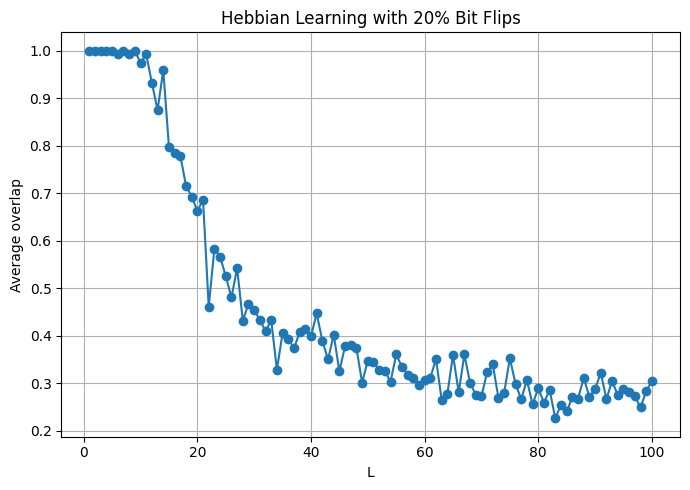

100%|██████████| 100/100 [00:11<00:00,  9.00it/s]


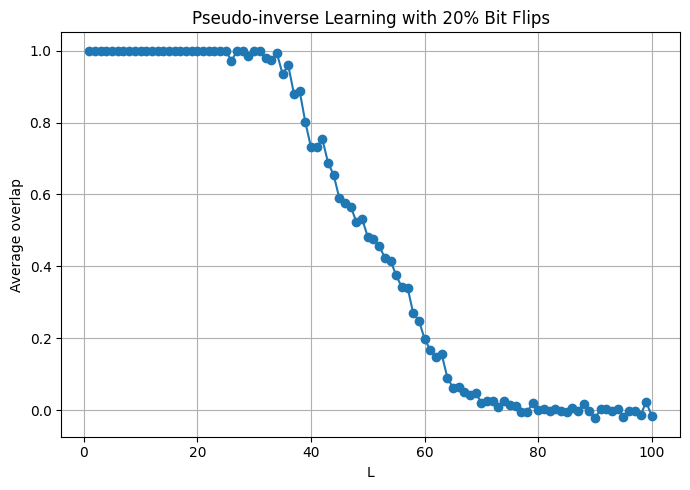

In [97]:
# ===== TODO: repeat (a) - (d), when doing (a) iii, randomly flip 20% of the selected pattern randomly ===== #

# ===== Hebbian Learning ===== #
# Define constants
K = 25 # (Optional) You can change this value
S = 100 # number of neurons
T_max = 100 # maxmimum number of iterations
flip_fraction = 0.2

# Do the following K times
overlap_list = []
for L in tqdm(range(1, S + 1)):
    overlap_L = 0
    for _ in range(K):

        # (a) i.
        X = np.random.choice([-1, 1], size=(L, S))
        # (a) ii.
        W = (1.0 / S) * np.dot(X.T, X)
        np.fill_diagonal(W, 0.0)
        # (a) iii.
        idx = np.random.randint(L)
        a = X[idx].copy()
        n_flip = int(0.2 * S)
        flip_idx = np.random.choice(S, n_flip, replace=False)
        a[flip_idx] *= -1

        # update until converge
        for _ in range(T_max):
            a_new = np.sign(np.dot(W, a))
            a_new[a_new == 0] = 1
            if np.array_equal(a_new, a):
                break
            a = a_new

        # overlap
        m = (1.0 / S) * np.dot(X[idx], a)
        overlap_L += m

    overlap_list.append(overlap_L / K)
# plot
plt.figure(figsize=(7,5))
plt.plot(range(1, S + 1), overlap_list, marker='o')
plt.xlabel("L")
plt.ylabel("Average overlap")
plt.title("Hebbian Learning with 20% Bit Flips")
plt.grid(True)
plt.tight_layout()
plt.show()
# ===== END OF Hebbian Learning ===== #

# ===== Pseudo Inverse ===== #
# Define constants
K = 25 # (Optional) You can change this value
S = 100 # number of neurons
T_max = 100 # maxmimum number of iterations

# Do the following K times
overlap_list = []
for L in tqdm(range(1,  S + 1)):
    overlap_L = 0
    for _ in range(K):

        # (a) i.
        X = np.random.choice([-1, 1], size=(L, S))
        # (a) ii.
        P = np.dot(X, X.T)
        P_inv = np.linalg.pinv(P)
        W = np.dot(np.dot(X.T, P_inv), X)
        np.fill_diagonal(W, 0.0)
        # (a) iii.
        idx = np.random.randint(L)
        a = X[idx].copy()
        n_flip = int(0.2 * S)
        flip_idx = np.random.choice(S, n_flip, replace=False)
        a[flip_idx] *= -1

        for _ in range(T_max):
            a_new = np.sign(np.dot(W, a))
            a_new[a_new == 0] = 1
            if np.array_equal(a_new, a):
                break
            a = a_new

        # overlap
        m = (1.0 / S) * np.dot(X[idx], a)
        overlap_L += m

    overlap_list.append(overlap_L / K)

# plot
plt.figure(figsize=(7,5))
plt.plot(range(1, S + 1), overlap_list, marker='o')
plt.xlabel("L")
plt.ylabel("Average overlap")
plt.title("Pseudo-inverse Learning with 20% Bit Flips")
plt.grid(True)
plt.tight_layout()
plt.show()

# ===== END OF Pseudo Inverse ===== #

# ===== End of TODO: repeat (a) - (d), when doing (a) iii, randomly flip 20% of the selected pattern randomly ===== #

#### What does such noise do to the storage capacity of the network?

Enter your answer here:
- To Hebbian Learning, it reverses the capacity where more patterns lead to higher capacity.
- To Pseudo Inverse, similar to influence on Hebbian Learning, the capacity depends on existing patterns more.
